In [1]:
import numpy as np
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

import numpy as np
import gc
import os
import sys
import cv2
import itertools
from PIL import Image

import random

from tqdm import tqdm


# Compare RMSE
---

In [2]:
path1="../output/analysis/cyclegan_pytorch/rmse_cossim_data.pkl"
path2="../output/analysis/cyclegan_unpaired_ver5.1.0/rmse_cossim_data.pkl"
df1=pd.read_pickle(path1)
df2=pd.read_pickle(path2)

In [3]:
display(df1.head())
display(df2.head())

,rmse,cos_sim
0,9.900259,6.016121e-07
1,9.974891,6.302323e-07
2,11.174098,1.088807e-07
3,9.910520,4.081053e-07
4,10.234939,6.306073e-08


,rmse,cos_sim
0,9.537980,3.718836e-07
1,9.244562,8.682515e-07
2,9.015011,5.717109e-07
3,9.219338,5.752897e-07
4,8.962821,2.207015e-07


In [4]:
df1.describe()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,10.282447,5.907736e-07
std,0.663706,4.650229e-07
min,7.183074,4.763019e-09
25%,9.985244,1.987778e-07
50%,10.358098,4.820258e-07
75%,10.699393,8.705487e-07
max,11.949320,1.967130e-06


In [5]:
df2.describe()
# df2.rmse.median()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,8.483480,9.488038e-07
std,1.414287,7.979452e-07
min,3.869243,2.994790e-08
25%,7.806676,3.476503e-07
50%,8.927419,7.721292e-07
75%,9.572852,1.281283e-06
max,10.360497,4.145323e-06


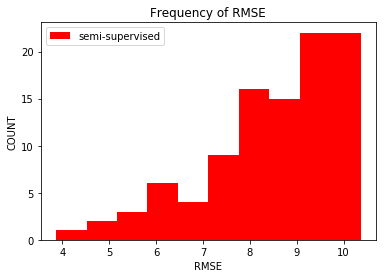

In [6]:
plt.hist(df2.rmse,bins=10, histtype='stepfilled',label="semi-supervised", color='r')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

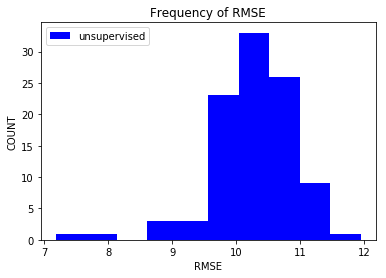

In [7]:
plt.hist(df1.rmse,bins=10, histtype='stepfilled',label="unsupervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

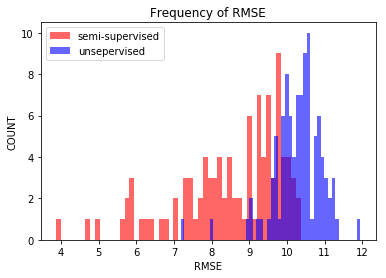

In [8]:
plt.hist(df2.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="semi-supervised", color='r')
plt.hist(df1.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="unsepervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

# Compare Image
---

In [9]:
def get_images(folder,num=100):
    fake_path=os.listdir(folder+"fake")
    depth_path=os.listdir(folder+"depth")
    color_path=os.listdir(folder+"color")
    images={"fake":[],"depth":[],"color":[]}
    for i in range(num):
        fake=cv2.imread(f"{folder}fake/{fake_path[i]}",0)
        depth=cv2.imread(f"{folder}depth/{depth_path[i]}",0)
        color=cv2.imread(f"{folder}color/{color_path[i]}")
        images["fake"].append(fake)
        images["depth"].append(depth)
        images["color"].append(color)
    return images

In [10]:
im_path1="../output/analysis/cyclegan_pytorch/"
im_path2="../output/analysis/cyclegan_unpaired_ver5.1.0/"

im_semi=get_images(im_path2)
im_un=get_images(im_path1)

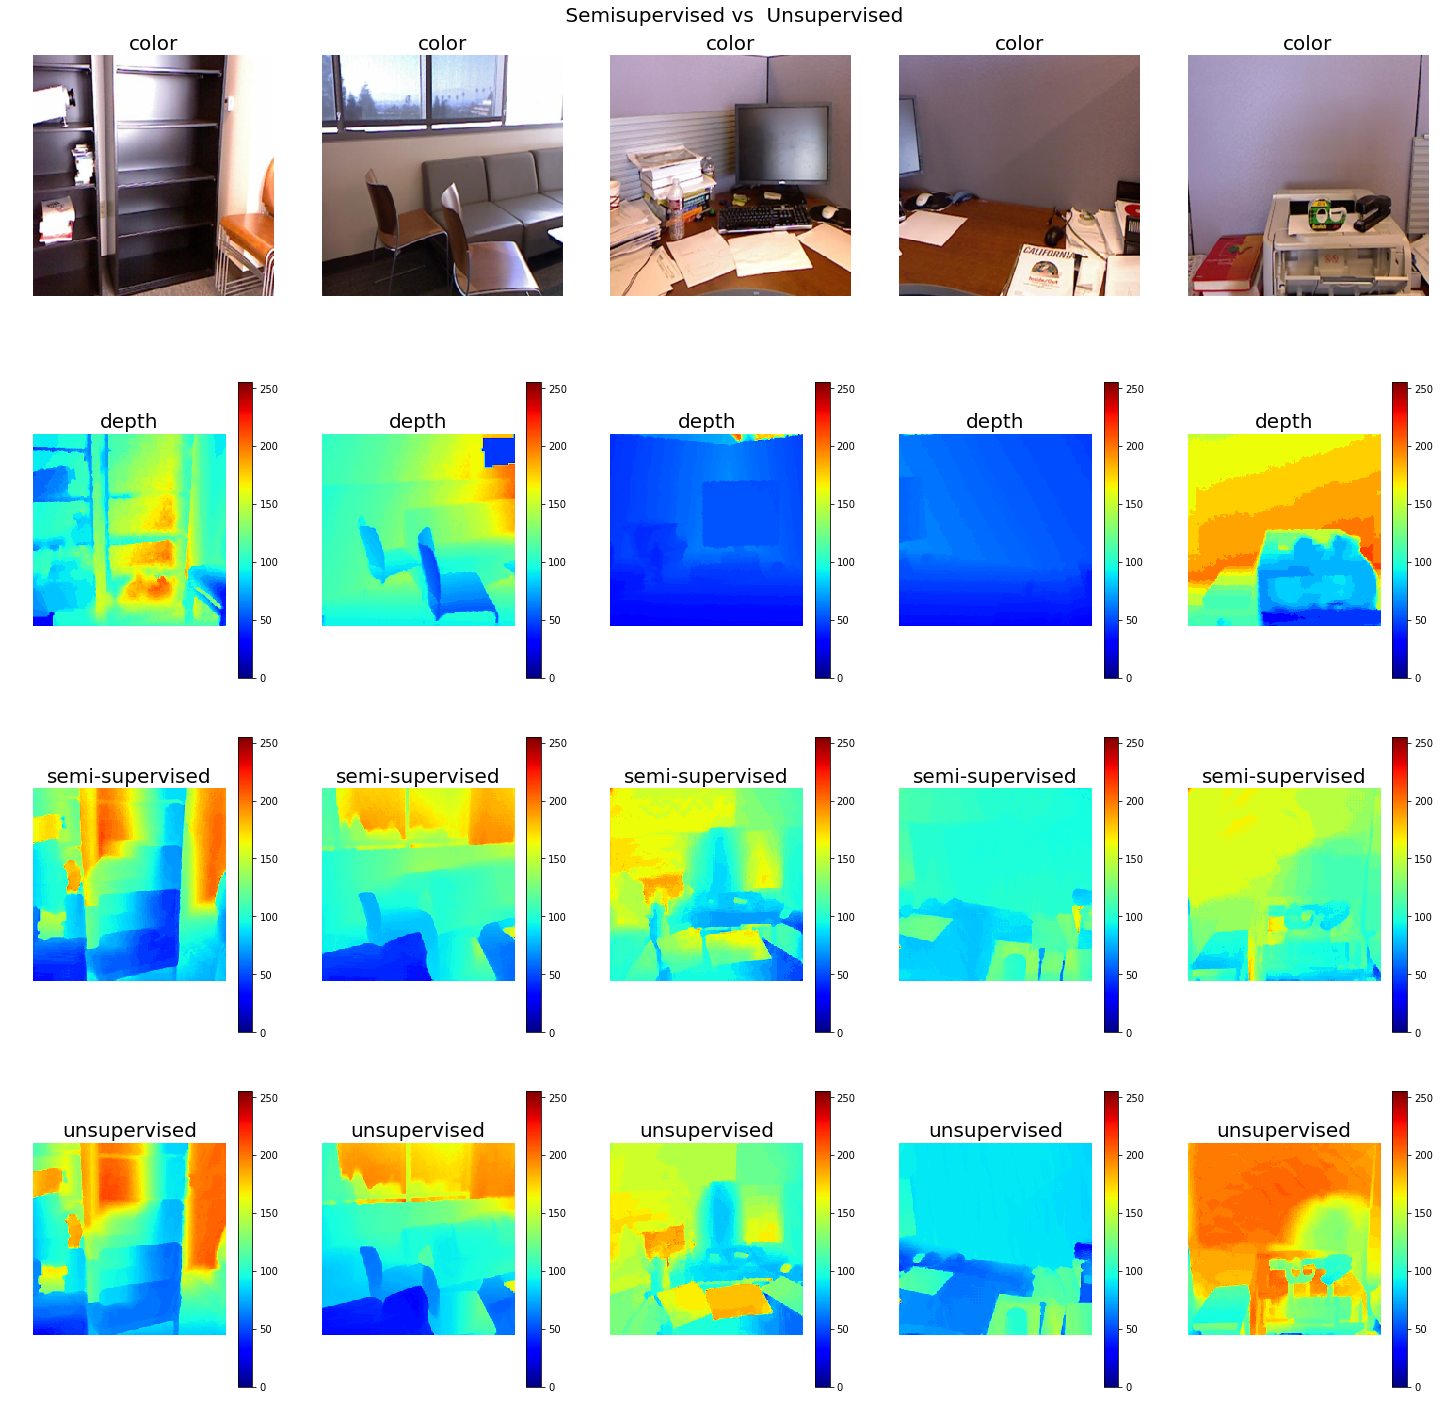

In [11]:
fig=plt.figure(figsize=(25,25))
plt.title(" Semisupervised vs  Unsupervised",fontsize=20)
plt.axis("off")

for i in range(5):

    ax=fig.add_subplot(4,5,i+1)
    ax.set_title("color",fontsize=20)
    ax.imshow(im_semi["color"][i])
    ax.axis("off")

    ax=fig.add_subplot(4,5,i+1+5)
    ax.set_title("depth",fontsize=20)
    a=ax.imshow(im_semi["depth"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5)
    ax.set_title("semi-supervised",fontsize=20)
    a=ax.imshow(im_semi["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5+5)
    ax.set_title("unsupervised",fontsize=20)
    a=ax.imshow(im_un["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)
    

In [23]:
def describe(x):
    print(f"mean: {np.mean(x)}")
    print(f"median: {np.median(x)}")
    print(f"std: {np.std(x)}")
    print(f"max: {np.max(x)}")
    print(f"min: {np.min(x)}")

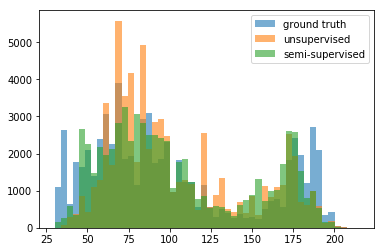

In [65]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(cv2.cvtColor(im_semi["color"][ind],cv2.COLOR_RGB2GRAY).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_semi["depth"][ind].reshape(-1),label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_un["fake"][ind].reshape(-1),label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_semi["fake"][ind].reshape(-1),label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.legend()

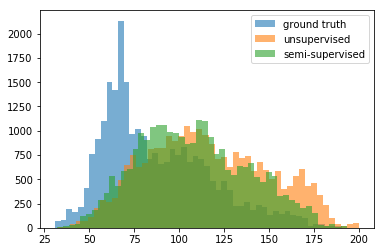

In [68]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(cv2.cvtColor(im_semi["color"][ind],cv2.COLOR_RGB2GRAY).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["depth"],axis=2).reshape(-1),label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_un["fake"],axis=2).reshape(-1),label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["fake"],axis=2).reshape(-1),label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.legend()

In [69]:
describe(im_semi["fake"][ind])
print()
describe(im_semi["depth"][ind])
print()
describe(im_un["fake"][ind])

mean: 104.52085876464844
median: 92.0
std: 44.31512202133097
max: 215
min: 30

mean: 101.94363403320312
median: 88.0
std: 49.96024905826356
max: 215
min: 30

mean: 103.60675048828125
median: 91.0
std: 40.3885908226555
max: 215
min: 30


In [71]:
describe(np.mean(im_semi["depth"],axis=2))
print()
describe(np.mean(im_un["fake"],axis=2))
print()
describe(np.mean(im_semi["fake"],axis=2))

mean: 87.52944686889649
median: 79.77734375
std: 29.86904101893766
max: 190.625
min: 30.7578125

mean: 115.84328872680663
median: 112.7734375
std: 33.4739343588776
max: 200.109375
min: 32.46484375

mean: 107.75074462890625
median: 105.82421875
std: 30.06330001047872
max: 193.2421875
min: 32.17578125


TypeError: Invalid dimensions for image data

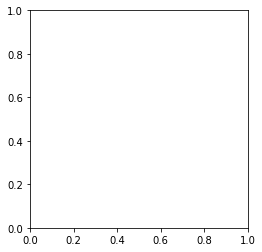

In [62]:
plt.imshow(im_semi["fake"][ind].mean(axis=1),cmap="jet", vmin = 0, vmax =255)

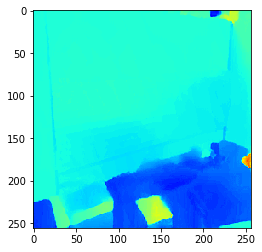

In [40]:
plt.imshow(im_un["fake"][ind],cmap="jet", vmin = 0, vmax =255)

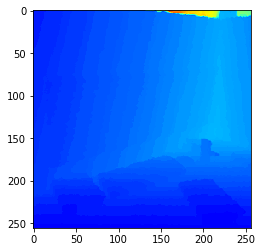

In [41]:
plt.imshow(im_semi["depth"][ind],cmap="jet", vmin = 0, vmax =255)


In [22]:
print(df2.rmse[ind])
print(df1.rmse[ind])

8.475928835762264
10.356692419921496
